# Importing required Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from geopandas.tools import geocode
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [30]:
# plotly for offline use
import plotly
plotly.offline.init_notebook_mode(connected=True)

# Utility Functions

In [31]:
def plot_cal(title, start, end):
    '''Plot incubation period'''
    inc_day = []
    for i in range(1, 29):
        if(i>=start and i<=end):
            inc_day.append(1)
        else:
            inc_day.append(0)
            
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(4, 7)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax=sns.heatmap(inc_day, linewidths=2, square=True, 
                   xticklabels='', yticklabels='', ax=ax,
                   cbar=False, cmap=['whitesmoke','royalblue'])
    ax.set_title(title, fontdict={'fontsize':16}, loc='left', pad=15)
    
    plt.show()

In [32]:
def plot_barh(col):
    
    temp_df = new.sort_values(col, ascending=False).head(15)
    temp_df = temp_df[temp_df[col]!=0]
    
    hover_data = ['Confirmed', 'Deaths']
    
    fig =  px.bar(temp_df, y='Country/Region', x=col, orientation='h', color='Country/Region', 
                  text=col, title=col, width=700, hover_data = hover_data,
                  color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_traces(textposition='auto')
    fig.update_layout(xaxis_title="", yaxis_title="", showlegend=False,
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()
    plt.savefig("img1.png", bbox_inches='tight')

In [33]:
def plot_pie(col1, col2, title, pal):

    temp = new[[col1, col2]].sum()
    temp = pd.DataFrame(temp).reset_index()
    temp.columns = ['Column', 'Value']
    
    fig = px.sunburst(temp, path=['Column'], values='Value',
                      color_discrete_sequence=pal, title=title)
    fig.data[0].textinfo = 'label+text+value+percent root'
    fig.show()

# Dataset

### Import files

In [34]:
# importing daywise dataset
df = pd.read_csv('/Users/pranjal27bhardwaj/Desktop/covid/datasets/day_wise.csv', parse_dates=['Date'])
df.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [35]:
# day wise data
day_wise = df.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'].sum()
# reset index
day_wise = day_wise.reset_index()
day_wise.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0           0              0                3.06                   5.05   
1           1              2                2.75                   4.59   
2           8              6                2.76                   3.83   
3          16              3                2.93                   2.72   
4          14             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [36]:
# importing summary dataset
latest = pd.read_csv('/Users/pranjal27bhardwaj/Desktop/covid/datasets/full_grouped.csv')

# first few rows
latest.head(10)

Date       Country/Region  Confirmed  Deaths  Recovered  Active  \
0  2020-01-22          Afghanistan          0       0          0       0   
1  2020-01-22              Albania          0       0          0       0   
2  2020-01-22              Algeria          0       0          0       0   
3  2020-01-22              Andorra          0       0          0       0   
4  2020-01-22               Angola          0       0          0       0   
5  2020-01-22  Antigua and Barbuda          0       0          0       0   
6  2020-01-22            Argentina          0       0          0       0   
7  2020-01-22              Armenia          0       0          0       0   
8  2020-01-22            Australia          0       0          0       0   
9  2020-01-22              Austria          0       0          0       0   

   New cases  New deaths  New recovered             WHO Region  
0          0           0              0  Eastern Mediterranean  
1          0           0              0                 Europe  
2          0           0              0                 Africa  
3          0           0              0                 Europe  
4          0           0              0                 Africa  
5          0           0              0               Americas  
6          0           0              0               Americas  
7          0           0              0                 Europe  
8          0           0              0        Western Pacific  
9          0           0              0                 Europe

In [37]:
# importing summary dataset
new = pd.read_csv('/Users/pranjal27bhardwaj/Desktop/covid/datasets/country_wise_latest.csv')

# first few rows
new.head(10)

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0          Afghanistan      36263    1269      25198    9796        106   
1              Albania       4880     144       2745    1991        117   
2              Algeria      27973    1163      18837    7973        616   
3              Andorra        907      52        803      52         10   
4               Angola        950      41        242     667         18   
5  Antigua and Barbuda         86       3         65      18          4   
6            Argentina     167416    3059      72575   91782       4890   
7              Armenia      37390     711      26665   10014         73   
8            Australia      15303     167       9311    5825        368   
9              Austria      20558     713      18246    1599         86   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0          10             18                3.50                  69.49   
1           6             63                2.95                  56.25   
2           8            749                4.16                  67.34   
3           0              0                5.73                  88.53   
4           1              0                4.32                  25.47   
5           0              5                3.49                  75.58   
6         120           2057                1.83                  43.35   
7           6            187                1.90                  71.32   
8           6            137                1.09                  60.84   
9           1             37                3.47                  88.75   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   
5                    4.62                   76             10   
6                    4.21               130774          36642   
7                    2.67                34981           2409   
8                    1.79                12428           2875   
9                    3.91                19743            815   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa  
5              13.16               Americas  
6              28.02               Americas  
7               6.89                 Europe  
8              23.13        Western Pacific  
9               4.13                 Europe

In [38]:
# load countries map
world_map = gpd.read_file('/Users/pranjal27bhardwaj/Desktop/sars/Humandevelopemnt/countries.geojson')
# avoid Antartica
world_map = world_map[world_map['name']!='Antarctica']
# select only important columns
world_map = world_map[['name', 'continent', 'geometry']]
# first few rows
world_map.head()

name      continent  \
0        Aruba  North America   
1  Afghanistan           Asia   
2       Angola         Africa   
3     Anguilla  North America   
4      Albania         Europe   

                                            geometry  
0  POLYGON ((-69.89912 12.45200, -69.89570 12.423...  
1  POLYGON ((74.89131 37.23164, 74.84023 37.22505...  
2  MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5...  
3  POLYGON ((-63.00122 18.22178, -63.16001 18.171...  
4  POLYGON ((20.06396 42.54727, 20.10352 42.52466...

## COVID-19 (CoronaVirus Disease) 

### Cause
> * Covid-19 (SARS-CoV-2) – virus identified in **Early 2020**. 
> * SARS-CoV-2 is thought to be an animal virus from an as-yet-uncertain animal reservoir, perhaps **bats**, that spread to other animals (**civet cats**)
> * It spread worldwide within a few months and a world wide shut down was observed. 
> * COVID is a virus transmitted through droplets that enter the air when someone with the disease coughs, sneezes or       talks. 
> * Major outbreaks causing to more than **11 Million** cases al around the world.
> * It was first infected humans in the **Wuhan province of southern China** in **2020**.

AttributeError: Unknown property fontfamily

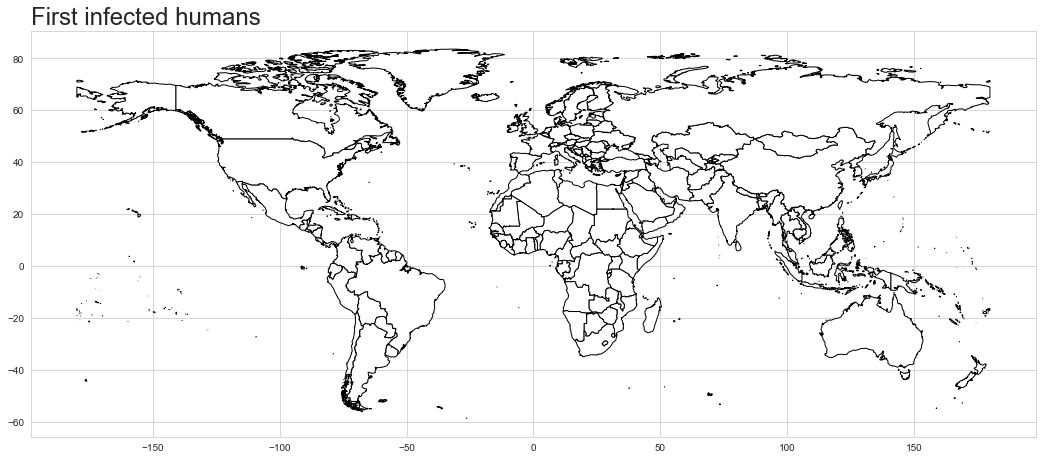

In [39]:
fig, ax = plt.subplots(figsize=(18, 14))
sns.set_style('whitegrid')

world_map.plot(ax=ax, color='white', edgecolor='black', alpha=1)
ax.set_title('First infected humans', 
             loc='left', fontdict={'fontsize': 24, 
                                   'fontfamily': 'monospace', 
                                   'fontweight': 'bold',
                                   'color': 'black'})

ax.scatter(105.7633, 35.3790, color='orangered', s=200, alpha=0.8)
ax.text(115.7633, 30.3790, 'Wuhan, China \nin 2020', 
        fontfamily='monospace', fontsize=12, fontweight='bold',
        color='white', backgroundcolor='black')

ax.set_axis_off()
plt.savefig("img.png", bbox_inches='tight')

### Transmission
> * Transmission of SARS-CoV-2 is primarily from person to person. 
> * It appears to have occurred mainly during the second week of illness, which corresponds to the peak of virus excretion in respiratory secretions and stool, and when cases with severe disease start to deteriorate clinically. 
> * Most cases of human-to-human transmission occurred in the health care setting, in the absence of adequate infection control precautions. 
> * Implementation of appropriate infection control practices brought the global outbreak to an end.

### Symptoms
> * Influenza-like and include fever
> * Malaise
> * Myalgia
> * Headache
> * Diarrhoea, and
> * Shivering (rigors).
> 
Most common symptoms:
fever
dry cough
tiredness
Less common symptoms:
aches and pains
sore throat
diarrhoea
conjunctivitis
headache
loss of taste or smell
a rash on skin, or discolouration of fingers or toes
Serious symptoms:
difficulty breathing or shortness of breath
chest pain or pressure
loss of speech or movement

### Nature of the disease
> * No individual symptom or cluster of symptoms has proved to be specific for a diagnosis of SARS. 
> * Although fever is the most frequently reported symptom, it is sometimes absent on initial measurement, especially in elderly and immunosuppressed patients.
> * Cough (initially dry), shortness of breath, and diarrhoea are present in the first and/or second week of illness. 
> * Severe cases often evolve rapidly, progressing to respiratory distress and requiring intensive care.

### Vaccines
> * None. Experimental vaccines are under development.
> * Expected dates are December month of 2020.

### Incubation period (time interval from infection with the virus to onset of symptoms)
> * Incubation period of SARS-CoV is from 1 to 6 days. 
> * A person infected with SARS-CoV-2 cannot spread the disease until they develop symptoms.

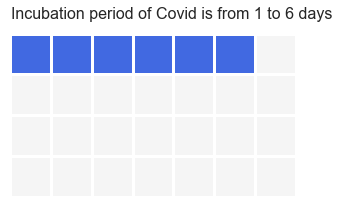

In [41]:
plot_cal('Incubation period of Covid is from 1 to 6 days', 1, 6)

### Geographical distribution
> * The disease appeared in January 2020 in the Wuhan province of southern China. 
> * This area is considered as a potential zone of re-emergence of SARS-CoV-2 due to the illegal practices in the wet market in the locality.
> * SARS-CoV affected all countries and resulted in more than 11.6M cases in 2020.

In [42]:
fig = px.choropleth(new, locations="Country/Region", locationmode='country names',
                    color="Confirmed", hover_name="Country/Region", 
                    color_continuous_scale="Sunset", 
                    title='Choropleth map cumulative no. of cases')
fig.update(layout_coloraxis_showscale=True)
fig.show()
plt.savefig('img.png')


<Figure size 432x288 with 0 Axes>

# EDA

## Country wise summary

In [43]:
plot_barh('Confirmed')

<Figure size 432x288 with 0 Axes>

## Recovered cases

In [44]:
plot_barh('Recovered')

<Figure size 432x288 with 0 Axes>

## Deaths

In [45]:
plot_barh('Deaths')

<Figure size 432x288 with 0 Axes>

## Death percentage

In [46]:
plot_barh('Deaths / 100 Cases')

<Figure size 432x288 with 0 Axes>

# Day wise analysis

### Functions for the analysis

In [47]:
def plot_daywise(col, hue):
    temp = day_wise[day_wise['Date'] > '2020-01-22']
    fig = px.area(temp, x="Date", y=col, width=700, 
                  color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [48]:
def plot_stacked(col):
    temp = latest[latest['Date'] > '2020-01-22']
    fig = px.area(temp, x="Date", y=col, color='Country/Region', 
                 height=600, title=col, 
                 color_discrete_sequence = px.colors.cyclical.mygbm)
    fig.update_layout(showlegend=True)
    fig.show()

## Confirmed

In [49]:
plot_daywise('Confirmed', 'black')

## Deaths

In [50]:
plot_daywise('Deaths', 'orangered')

## Recovered

In [51]:
plot_daywise('Recovered', 'limegreen')

## Active cases

In [52]:
plot_daywise('Active', 'crimson')

## Confirmed

In [53]:
plot_stacked('Confirmed')

## Deaths

In [54]:
plot_stacked('Deaths')

## Recovered

In [55]:
plot_stacked('Recovered')

## Active

In [56]:
plot_stacked('Active')